# Problem statement: 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Motivation**: To create a multiclass classification model using a custom convolutional neural network in tensorflow

**Data Summary:**

The dataset consists of 2,357 malignant and benign oncological diseases formed from the International Skin Imaging Collaboration (ISIC).   The images were stored in directories with the same name as the disease.

All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:
1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion
 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [6]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
# Importing files from the google drive
root_path = '/content/gdrive/MyDrive/MSC/CNN'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [15]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f'There are {image_count_train:,.0f} files in the train data')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))

print(f'There are {image_count_test:,.0f} files in the test data')


There are 2,239 files in the train data
There are 118 files in the test data


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [16]:
batch_size = 32
img_width = 180
img_height = 180

Use 80% of the images for training, and 20% for validation.

In [17]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_width,img_height),
                                                               batch_size=batch_size,validation_split=0.2,
                                                               subset='training',seed=123)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_width,img_height),
                                                             batch_size=batch_size,validation_split=0.2,
                                                             subset='validation',seed=123)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [19]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(f'Class Names: {class_names}')

Class Names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [20]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

from PIL import Image
fig=plt.figure(figsize=(30,20))
c=1
for f in data_dir_train.iterdir():
  im=Image.open(f.iterdir().__next__())
  plt.subplot(3,3,c)
  plt.imshow(im)
  plt.title(str(f).split('/')[-1])
  c+=1
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [21]:
#Created a CNN model, which can accurately detect 9 classes present in the dataset.
number_of_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255,input_shape=(180,180,3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(number_of_classes)
  
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [22]:
### Todo, choose an appropirate optimiser and loss function.. Defined appropriate optimiser and loss function for model training
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

### Train the model

In [ ]:
#Trained the model for ~20 epochs.
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
169/169 [==============================] - ETA: 0s - loss: 1.8714 - accuracy: 0.2784 

### Visualizing training results

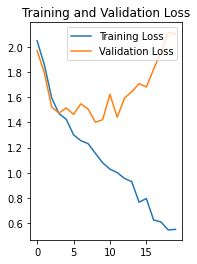

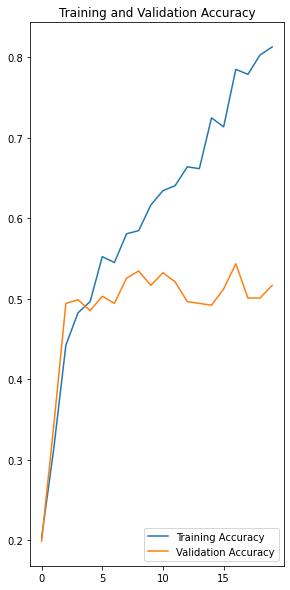

In [ ]:
#Visualizing training results
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Findings:    
*There is a huge gap between the Validation accuracy of 0.51 and the training accuracy of 0.81 after 20 epochs. This shows that the model is overfitting.*

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

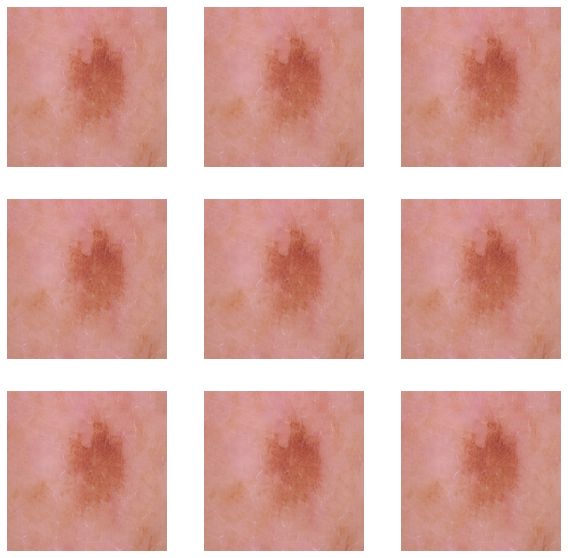

In [ ]:
# Your code goes here
# Todo, visualize how your augmentation strategy works for one instance of training image.
for batch,labels in train_ds.take(1):
  image=batch[0]
  image=tf.reshape(image,(1,img_width,img_height,3))
  
plt.figure(figsize=(10, 10))
for i in range(9):
  aug_img = data_augmentation(image)[0]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(aug_img.numpy().astype("uint8"))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_of_classes)
])



### Compiling the model

In [ ]:
## Model compliing
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 53ms/step - loss: 2.0780 - accuracy: 0.2472 - val_loss: 1.8690 - val_accuracy: 0.3266
Epoch 2/20
56/56 [==============================] - 3s 51ms/step - loss: 1.8111 - accuracy: 0.3415 - val_loss: 1.7074 - val_accuracy: 0.4519
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5777 - accuracy: 0.4565 - val_loss: 1.5264 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 3s 46ms/step - loss: 1.4460 - accuracy: 0.4877 - val_loss: 1.4977 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 3s 47ms/step - loss: 1.4275 - accuracy: 0.4900 - val_loss: 1.4977 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3780 - accuracy: 0.5156 - val_loss: 1.4388 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3769 - accuracy: 0.5123 - val_loss: 1.3961 - val_accuracy: 0.5190
Epoch 8/20
56

### Visualizing the results

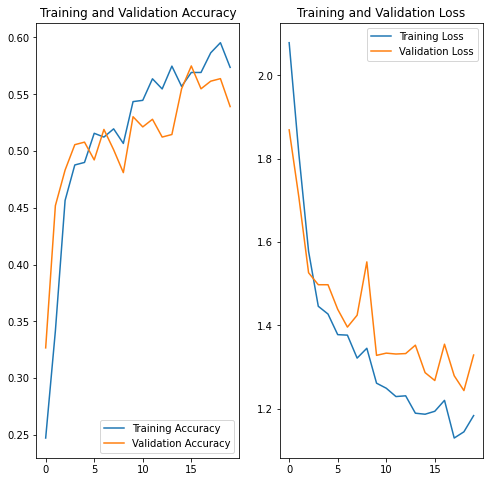

In [ ]:
# Visualizing the results after using dropout layer and training the model with 20 epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?




## Now we can see that the Training accuracy of 0.6462  and validation accuracy of 0.5369 are very close; thus, the model is not overfitting
Since the Training and Validation accuracy are less than 0.70, we can confirm that there is no underfitting.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f' There are {image_count_train} images in training dataset')

2239


In [ ]:
#Distribution of classes in the dataset
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
l_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dictionary = dict(zip(path_list, l_list))
original_df = pd.DataFrame(list(dataframe_dictionary.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
## - seborrheic keratosis has the least number of samples, i.e., 77

#### - Which classes dominate the data in terms proportionate number of samples?
## - pigmented benign keratosis dominates other classes with a score of  462

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
#('/content/drive/MyDrive/Train')
#path_to_training_dataset= '/content/drive/MyDrive/Train'
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    #p.process()
    p.sample(1000) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F71AD28ED00>: 100%|██████████| 1000/1000 [00:48<00:00, 20.71 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7297DD0C40>: 100%|██████████| 1000/1000 [00:36<00:00, 27.29 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F729FB3EC10>: 100%|██████████| 1000/1000 [00:38<00:00, 26.23 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F729269AD30>: 100%|██████████| 1000/1000 [03:12<00:00,  5.20 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F7215F422E0>: 100%|██████████| 1000/1000 [03:04<00:00,  5.42 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7215F92A30>: 100%|██████████| 1000/1000 [00:37<00:00, 26.58 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F71E0150F40>: 100%|██████████| 1000/1000 [01:27<00:00, 11.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F71AD664130>: 100%|██████████| 1000/1000 [00:38<00:00, 25.97 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F722C21F7C0>: 100%|██████████| 1000/1000 [00:37<00:00, 26.43 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list_updated = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_updated[:2]

['/content/drive/MyDrive/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028577.jpg_70bf65fe-78b1-42d2-8165-90da1ed98c11.jpg',
 '/content/drive/MyDrive/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0031470.jpg_9f025f41-2142-436f-8fc0-e91b4e77456f.jpg']

In [ ]:
lesion_list_updated = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_updated[:2]

['basal cell carcinoma', 'basal cell carcinoma']

In [ ]:
dataframe_dict_updated = dict(zip(path_list_updated, lesion_list_updated))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_updated.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', #Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),batch_size=batch_size
  )

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
numer_of_classes = 9

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(numer_of_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
## Updated the code using 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
281/281 [==============================] - 65s 218ms/step - loss: 1.7573 - accuracy: 0.3136 - val_loss: 1.5206 - val_accuracy: 0.4232
Epoch 2/50
281/281 [==============================] - 57s 198ms/step - loss: 1.4055 - accuracy: 0.4570 - val_loss: 1.3760 - val_accuracy: 0.4766
Epoch 3/50
281/281 [==============================] - 57s 198ms/step - loss: 1.3136 - accuracy: 0.4939 - val_loss: 1.3702 - val_accuracy: 0.4757
Epoch 4/50
281/281 [==============================] - 55s 192ms/step - loss: 1.2462 - accuracy: 0.5140 - val_loss: 1.2873 - val_accuracy: 0.5154
Epoch 5/50
281/281 [==============================] - 55s 193ms/step - loss: 1.1927 - accuracy: 0.5359 - val_loss: 1.1226 - val_accuracy: 0.5492
Epoch 6/50
281/281 [==============================] - 57s 200ms/step - loss: 1.1457 - accuracy: 0.5540 - val_loss: 1.1499 - val_accuracy: 0.5536
Epoch 7/50
281/281 [==============================] - 55s 194ms/step - loss: 1.0748 - accuracy: 0.5755 - val_loss: 1.1002 - val_ac

#### **Todo:**  Visualize the model results

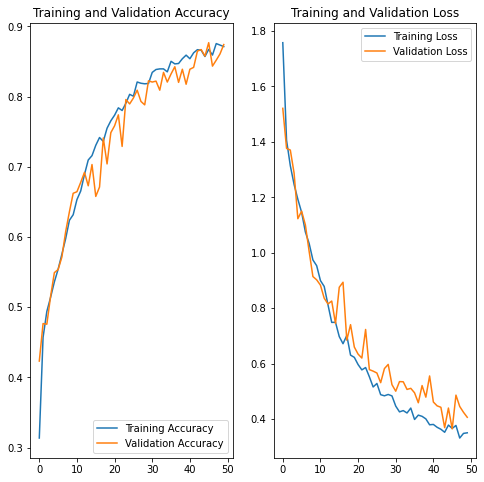

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Underfitting and overfitting have been resolved
- Training and Validation accuracy are very close `0.87`
- The training and validation accuracy is higher than the prior model.




In [ ]:
# Augmentor with samples (1000)... Test data accuracy seems not that great !!

test_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,image_size=(img_width,img_height),
                                                            shuffle=False,batch_size=120)
predictions=model.predict(test_ds)
score = tf.nn.softmax(predictions)
_, labels = tuple(zip(*test_ds))
print(f'Lables: {labels}')
print()
print(np.argmax(score,axis=-1))
print()

from sklearn.metrics import accuracy_score
print('Test Accuracy')
accuracy_score(labels[0].numpy(),np.argmax(score,axis=-1))

Found 118 files belonging to 9 classes.
1/1 [==============================] - 27s 27s/step
(<tf.Tensor: shape=(118,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8], dtype=int32)>,)

[3 4 4 4 1 7 5 5 4 4 4 4 6 5 4 4 5 0 1 1 1 1 1 5 1 1 1 4 7 7 1 5 3 3 0 4 6
 4 4 2 1 2 2 2 2 1 2 7 4 0 4 4 4 6 8 3 4 1 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 4 4 4 4 4 7 5 5 5 2 7 3 5 0 5 5 5 7 0 5 7 3 3 3 4 8 5 4 4 7 7 5 7 5 1 7
 5 1 7 7 8 8 8]

Test Accuracy


0.4152542372881356